# Tutorial
This Jupyter notebook is meant to serve as a guide for demonstrating how to use the Direct-Stiffness Method & its Geometric Stiffness Extension and construct frames with their relavent elements and nodes. To use this notebook, please run each cell individually, and you will encounter the examples and solutions as you keep going through. If you have any questions on how to get the code up and running, please refer to the README.md 

It is essential that the first python block in this notebook is ran first, otherwise the rest of the cells will have difficulty running.

In [1]:
'''
This code block imports the essential/main Direct-Stiffness module, matplotlip and numpy.
'''
import numpy as np
import matplotlib.pyplot as plt
from Geometric_stiffness_2nd_try import Nodes, Elements, Frame


## Explaining the Direct Stiffness Matrix

The Direct Stiffness Method is used for the analysis of frames and different structures. We use the direct stiffness matrix in analyzing displacements, forces, and moments around nodes and elements. This notebook contains a tutorial on using this method to assemble the global stiffness matrix and use it to solve for displacements and reactions.

### Example: Simple Beam Structure

For example 1, we will analyze a simple beam structure which consists of two nodes and one element. The breakdown of the code is fairly straightforward. We first define our nodes with their given properties, we connect the nodes through defining elements with more properties, and finally we assemble them together in the frame class. Once the entire frame is assembled, we run the calculations method which runs through calculating the global stifness matrix, local matrices, and the way the nodes are affected. The results provide us with analysis of the forces and displacements.

**Step 1: Define Nodes**

We start by defining the nodes of the structure. Each node has coordinates (x, y, z) and can have boundary conditions (pinned, fixed, free) applied to it.

The code below is an example of 2 nodes being created 1 meter apart, along with boundary constraints set for both where one cannot move, but the second can.


In [2]:
 # Define Nodes
nodes = []
nodes.append(Nodes(0.0, 0.0, 0.0))
nodes.append(Nodes(30.0, 40.0, 0.0))

# Apply boundary conditions
nodes[0].set_boundary_constraints([True, True, True, True, True, True])  # Node 1 constrained in all directions
nodes[1].set_boundary_constraints([False, False, False, False, False, False])   # Node 2 unconstrained

nodes[1].set_nodal_load((-3/5), (-4/5), 0, 0, 0, 0)


**Step 2: Define Elements**

Next, we define the elements of the structure. Each element connects two nodes and has material properties such as Young's modulus, Poisson's ratio, and cross-sectional area.

In [3]:
E = 1000  # Young's Modulus in Pascals
r = 1  # Width of the beam in meters
v = 0.3  # Poisson's Ratio

# Cross-sectional properties
A = np.pi * r ** 2.0  # Cross-sectional Area in square meters
I_y = np.pi * r ** 4.0 / 4.0  # Moment of Inertia about y-axis
I_z = np.pi * r ** 4.0 / 4.0  # Moment of Inertia about z-axis
I_p = np.pi * r ** 4.0 / 2.0  # Polar Moment of Inertia 
J = np.pi * r ** 4.0 / 2.0  # Torsional Constant

# Local z-axis directions
local_z_axis = [0, 0, 1]

# Assuming Elements class exists and nodes list is defined
elements = []
elements.append(Elements(nodes[0], nodes[1], E, v, A, I_y, I_z, I_p, J, local_z_axis))



**Step 3: Create Frame and Perform Analysis**

We create a frame by combining the nodes and elements. We then perform the analysis to compute the global stiffness matrix, displacements, and reactions.

## Geometric Stiffness Analysis

The geometric stiffness component comes from plotting the deformed shaped, plotting the internal forces, and lastly when calculating the critical load factor. We combine the Elastic Stiffness Matrix along with the Geometric Stiffness in our load analysis. 

## Formula
The generalized eigenvalue problem is given by:

$$ (K - \lambda K_g) \mathbf{u} = 0 $$

where:
- $K$ is the global stiffness matrix.
- $K_g$ is the global geometric stiffness matrix.
- $\lambda$ is the eigenvalue (critical load factor).
- $\mathbf{u}$ is the eigenvector.

The smallest positive eigenvalue $\lambda$ represents the **Elastic Critical Load Factor**.



Critical Load Factor: 0.7809879011060845


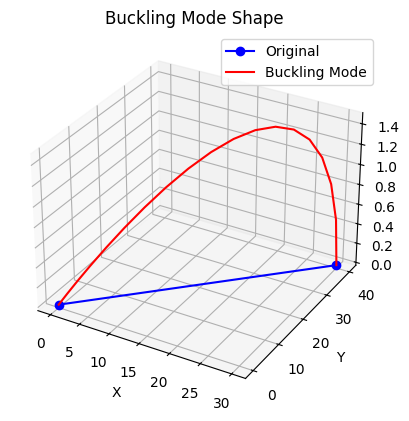

In [5]:
# Create Frame
frame = Frame(nodes, elements)

# Perform Analysis
U, R = frame.calculations()

# Critical Load Factor
critical_load_factor, eigenvector = frame.elastic_critical_load()
print(f"\nCritical Load Factor: {critical_load_factor}")

# Plot the buckling shape
frame.plot_buckled_shape(eigenvector)


### Results

We see the results printed in the notebook after running the final code.
Specifically we should pay attention to the Elastic Critical Load Factor which shows us the buckling load.

## Optional Assignment_2_2

This jupyter notebook file has easy, all-in-one cells that have pre-built nodes, elements, and frames. You can edit those directly and change values based on need.
